
Age	Wing Length
3	1.4
4	1.5
5	2.2
6	2.4
7	3.1
8	3.2
9	3.2
11	3.9
12	4.1
14	4.7
15	4.5
16	5.2
17	5.0
Answers to the exercises below will be found here after the due date.

1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line.
3. Can you reject H0: b = 0? yes
4. Calculate and plot the confidence intervals on the slope of the regression.
4. Calculate r squared
 (the coefficient of determination)
6. Calculate Pearson's r.
7. Add some noise to the data and see how the regression changes.

Code created with the assistance of chatgpt: https://chat.openai.com/share/a4ba572e-68dc-468d-ab46-843af777f7f8

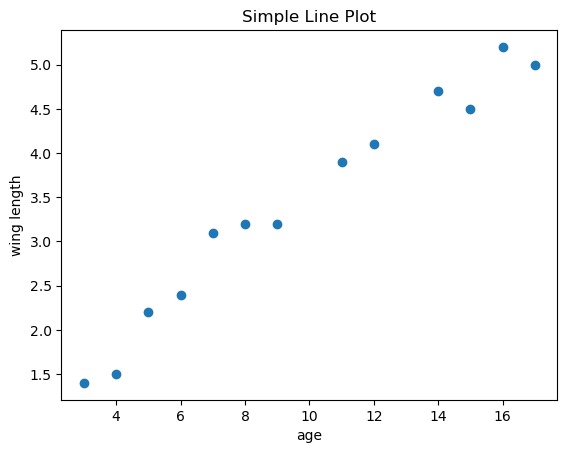

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
y = [1.4, 1.5, 2.2 , 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]  #wing length in cm 
x = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17] #age


# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.ylabel('wing length')
plt.xlabel('age')
plt.title('Simple Line Plot')

# Display the plot
plt.show()

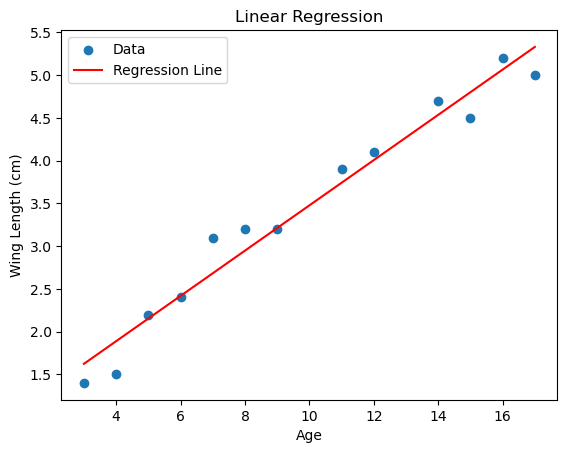

Slope (m): 0.2646841206602162
Intercept (b): 0.8296243597040408


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
y = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]  # Wing length in cm
x = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]  # Age

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Calculate the slope (m) and intercept (b) for the linear regression line
m, b = np.polyfit(x, y, 1)

# Create a scatter plot
plt.scatter(x, y, label='Data')

# Add labels and a title
plt.ylabel('Wing Length (cm)')
plt.xlabel('Age')
plt.title('Linear Regression')

# Plot the regression line
plt.plot(x, m * x + b, color='red', label='Regression Line')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Print the slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           3.01e-09
Time:                        17:27:00   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

/Users/fhollo24/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


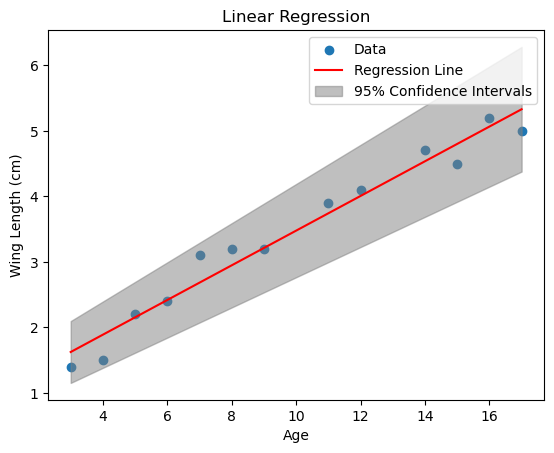

Slope Estimate (m): 0.2646841206602163
95% Confidence Intervals for Slope: (0.46042944415431325, 1.1988192752537674)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample data
y = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]  # Wing length in cm
x = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]  # Age

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Fit the linear regression model
x = sm.add_constant(x)  # Add a constant term (intercept) to the independent variable
model = sm.OLS(y, x).fit()

# Print the summary of the regression model, including confidence intervals
print(model.summary())

# Extract the confidence intervals for the slope (m)
conf_int = model.conf_int(alpha=0.05)  # Get the 95% confidence intervals

# Get the slope estimate
slope_estimate = model.params[1]

# Create a scatter plot
plt.scatter(x[:, 1], y, label='Data')

# Add labels and a title
plt.ylabel('Wing Length (cm)')
plt.xlabel('Age')
plt.title('Linear Regression')

# Plot the regression line
plt.plot(x[:, 1], model.predict(), color='red', label='Regression Line')

# Plot the confidence intervals on the slope
plt.fill_between(x[:, 1], conf_int[1, 0] * x[:, 1] + conf_int[0, 0], conf_int[1, 1] * x[:, 1] + conf_int[0, 1], color='gray', alpha=0.5, label='95% Confidence Intervals')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Print the slope estimate and its confidence intervals
print(f"Slope Estimate (m): {slope_estimate}")
print(f"95% Confidence Intervals for Slope: ({conf_int[0, 0]}, {conf_int[0, 1]})")


In [8]:
import numpy as np
import statsmodels.api as sm

# Sample data
y = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]  # Wing length in cm
x = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]  # Age

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Add a constant term (intercept) to the independent variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Calculate R-squared
r_squared = model.rsquared

# Print the R-squared value
print(f"R-squared: {r_squared}")


R-squared: 0.9633822518042857


In [9]:
import numpy as np
from scipy.stats import pearsonr

# Sample data
x = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]  # Wing length in cm
y = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]  # Age

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Calculate Pearson's correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(x, y)

# Print Pearson's r and the p-value
print(f"Pearson's r: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson's r: 0.981520377681628
P-value: 3.0097431724570356e-09


Regression Results with Noise:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     225.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.13e-08
Time:                        17:33:14   Log-Likelihood:                -17.931
No. Observations:                  13   AIC:                             39.86
Df Residuals:                      11   BIC:                             40.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9373

/Users/fhollo24/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


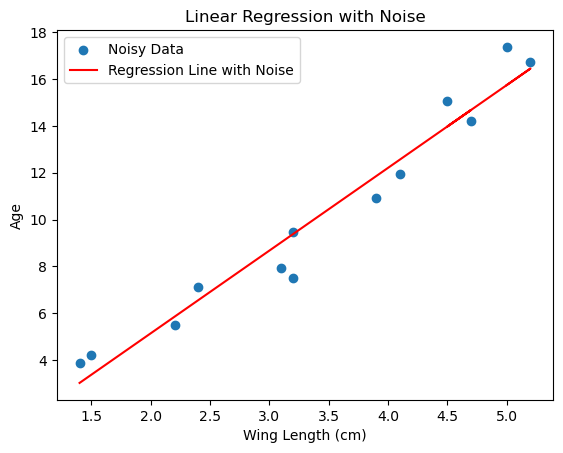

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample data
x = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])  # Wing length in cm
y = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])  # Age

# Add noise to the data
np.random.seed(0)  # Set a seed for reproducibility
noise = np.random.normal(0, 0.5, len(x))  # Add Gaussian noise with mean 0 and standard deviation 0.5
y_with_noise = y + noise

# Add a constant term (intercept) to the independent variable
x = sm.add_constant(x)

# Fit the linear regression model to the noisy data
model_with_noise = sm.OLS(y_with_noise, x).fit()

# Print the summary of the regression model for the noisy data
print("Regression Results with Noise:")
print(model_with_noise.summary())

# Plot the noisy data and regression line
plt.scatter(x[:, 1], y_with_noise, label='Noisy Data')
plt.plot(x[:, 1], model_with_noise.predict(), color='red', label='Regression Line with Noise')
plt.xlabel('Wing Length (cm)')
plt.ylabel('Age')
plt.legend()
plt.title('Linear Regression with Noise')

# Display the plot
plt.show()
